### Libraries used in the notebook

In [13]:
import csv
import matplotlib.pyplot as plt
import random
from scipy.stats import poisson
from scipy import stats
import numpy as np
import pickle
import gzip
import pandas as pd
import seaborn as sns
import re
import networkx as nx

<center><h1>Analysis of the 172 Brightest Stars </h1>
    <h3>(Through Magnitude 3.00)</h3>
 <h2>by Quinn Phillips</h2> </center>

<center><h2>Data collection and extraction</h2></center>
<p>
    The website <a href="http://stars.astro.illinois.edu/sow/sowlist.html">[STARS]</a> contains
an extensive archive of 950 stars with information pertaining to name, spectral class, distance(LY), apparent magnitude, absolute magnitude, radial velocity(km/s), velocity(km/s), and temperature(K).
</p>

<p>
I utilized the data found in the sub-site <a href="http://stars.astro.illinois.edu/sow/bright.html">[172 brightest stars]</a> where the data is presented in a table that is organized by magnitude. The HTML layout of this page is extremely simple as it does not even use any <i>div tags</i>. This made data collection somewhat facile in the sense that I could just reference the table elements without much code.  
</p>


<p>
For each star, nine columns of pertinant information can be found.
Each row is dedicated to the nine components of the star data. One can easily extract information about individual stars by going along all rows of this table.
</p>

<p>
The script first sources the data, then replaces the spectral class characters in order to simplify the data for further usage. Next the data is further cleansed and prepared for a multitude of engaging visualizations. 
</p>


<p>
Check out the code below:
</p>

In [14]:

##Utilizing pandas for csv writing
url = 'http://stars.astro.illinois.edu/sow/bright.html'
#data = pd.read_html(url)
#data[0].to_csv('1stars.csv')

##Displaying csv data with pandas dataframe
df = pd.read_csv('1stars.csv')
df = df.drop(labels=0, axis=0)

##Replacing class variations
del df['0']
df['3'] = df['3'].str.replace(r'^A[\(\)\+\.\-+a-zA-Z0-9]+', 'A', regex = True)
df['3'] = df['3'].str.replace(r'^F[\(\)\+\.\-+a-zA-Z0-9]+', 'F', regex = True)
df['3'] = df['3'].str.replace(r'^G[\(\)\+\.\-+a-zA-Z0-9]+', 'G', regex = True)
df['3'] = df['3'].str.replace(r'^K[\(\)\+\.\-+a-zA-Z0-9]+', 'K', regex = True)
df['3'] = df['3'].str.replace(r'^B[\(\)\+\.\-+a-zA-Z0-9]+', 'B', regex = True)
df['3'] = df['3'].str.replace(r'^O[\(\)\+\.\-+a-zA-Z0-9]+', 'O', regex = True)
df['3'] = df['3'].str.replace(r'^M[\(\)\+\.\-+a-zA-Z0-9]+', 'M', regex = True)
df['3'] = df['3'].str.replace(r'^W[\(\)\+\.\-+a-zA-Z0-9]+', 'M', regex = True)

display(df)

,Unnamed: 0,1,2,3,4,5,6,7,8,9
1,1,Sirius,Alpha CMa,A,8.6,-1.46,1.43,-8,19,White dwarf companion
2,2,Canopus,Alpha Car,F,309,-0.72,-5.60,21,25,X-rays from hot corona; may become neon white ...
3,3,Rigil Kentaurus A,Alpha Cen A,G,4.36,-0.01,4.34,-23,33,"Companion Proxima Cen, 11.05 mag, M5.5V"
4,4,Rigil Kentaurus B,Alpha Cen B,K,4.36,1.33,5.68,-23,33,Combined magnitude -0.29; by itself would rank...
5,5,Arcturus,Alpha Boo,K,37,-0.04,-0.30,-5,122,High velocity
...,...,...,...,...,...,...,...,...,...,...
169,169,Alnasl,Gamma-2 Sgr,K,96,2.99,0.64,22,34,Gateway to Cepheid W Sgr
170,170,Zeta Tau,Zeta Tau,B,420,3.00,-2.53,20,22,Classic B-emission star
171,171,Beta Tri,Beta Tri,A,124,3.00,0.09,9.9,30,Really a dwarf; close sunlike companion
172,172,Gamma Hydrae,Gamma Hya,G,132,3.00,-0.04,-5.4,16,A star in transition


Downloaded data is stored in a csv file. Each row of the csv file corresponds to one of the 172 stars. Each column of the rows contains information pertaining to the proper name, greek letter name, spectral class, distance(LY), apparent magnitude, absolute magnitude, radial velocity(km/s), velocity(km/s) and remarks about the star.

<center><h1>Data analysis</h1>

<center><h2>Scatter plot of Apparent Magnitude vs. Distance</h2>

<p>
As a first example of data analysis, we consider the relation between a stars distance and it's apparent magnitude. We first need to clean the special characters out of the data, so that things will go smoothly when making our visualizations.This is done with the following piece of code.
</p>

In [15]:

##clean/remove special chars.
df['4'] = df['4'].str.replace('[#,?,&,NaN]', '',regex=True)
df['4'] = pd.to_numeric(df['4'], errors='coerce')

df['5'] = df['5'].str.replace('[#,?,&]', '',regex=True)
df['5'] = pd.to_numeric(df['5'], errors='coerce')

df['7'] = df['7'].str.replace('[#,?,&]', '',regex=True)
df['7'] = pd.to_numeric(df['7'], errors='coerce')

#df.info()
#display(x)

<p>
We then visualize the data. We perform a linear fit, and visualize the best line that fits all data points.
</p>

alpha :  238.23451987998166
beta :  45.665982019297864
correlation coefficient :  0.08577382291186893


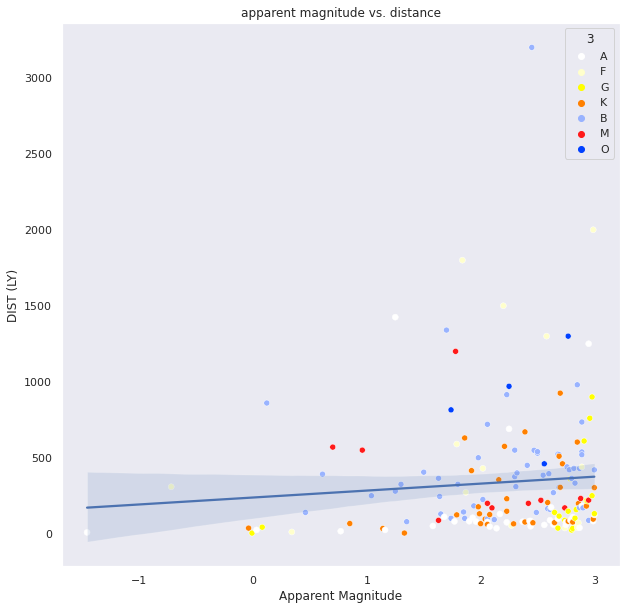

In [16]:

##Remove grid
sns.set_style(style='dark')

##Perform linear regression
x = df['5']
y = df['4']

x = np.array(df['5'])
x = x[~np.isnan(x)]
y = np.array(df['4'])
y = y[~np.isnan(y)]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print ('alpha : ', intercept)
print ('beta : ', slope)
print ('correlation coefficient : ', r_value)

##Declare correct class colors blue - red
c= ["#ffffff", "#ffffcc", "#ffff00", "#ff8000", "#99b3ff", "#ff1a1a", "#0040ff"]

##Display scatterplot
plt.subplots(figsize=(10, 10))

s = sns.scatterplot(data=df, x=df['5'], y=df['4'], hue=df['3'], palette=c)
sns.regplot(data=df, x=df['5'], y=df['4'], scatter=False, ax=s);
s.set(xlabel='Apparent Magnitude', ylabel='DIST (LY)', title='apparent magnitude vs. distance')

plt.show()

My first scatter plot focused on seeing if there is correlation between a stars distance and apparent magnitude. I assumed that the data would show a positive correlation, which presumes that the further away stars would have a higher app. magnitude (the further the star, the dimmer it becomes). My assumption proved to be incorrect, as the correlation coefficent value was 0.08. Therefore, there appears to be no relationship here. 

<center><h2>Scatter plot of Radial Velocity vs. Distance</h2>

<p>
As a second example of data analysis, we consider the relation between a stars distance and it's radial velocity(km/s). Let's visualize the data below. We perform a linear fit, and visualize the best line that fits all data points.  
</p>

alpha :  318.6412524309505
beta :  5.011234631924519
correlation coefficient :  0.22856139006536136


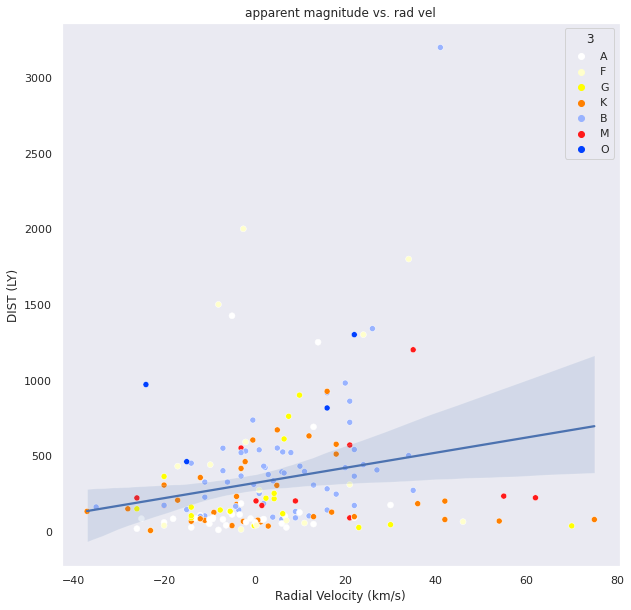

In [17]:

##Remove grid
sns.set_style(style='dark')

##Perform linear regression
x = df['7']
y = df['4']

x = np.array(df['7'])
x = x[~np.isnan(x)]
y = np.array(df['4'])
y = y[~np.isnan(y)]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print ('alpha : ', intercept)
print ('beta : ', slope)
print ('correlation coefficient : ', r_value)

##Declare correct class colors blue - red
c= ["#ffffff", "#ffffcc", "#ffff00", "#ff8000", "#99b3ff", "#ff1a1a", "#0040ff"]

##Display scatterplot
plt.subplots(figsize=(10, 10))

s = sns.scatterplot(data=df, x=df['7'], y=df['4'], hue=df['3'], palette=c)
sns.regplot(data=df, x=df['7'], y=df['4'], scatter=False, ax=s);
s.set(xlabel='Radial Velocity (km/s)', ylabel='DIST (LY)', title='apparent magnitude vs. rad vel')

plt.show()

My second scatter plot focused on seeing if there is correlation between a stars distance and radial velocity. I assumed that the data would show a positive correlation, which presumes that the negative rad velocity stars would be closer, and positive rad velocity stars would be further (negative value=blueshift/indicating approach, positive value=redshift/indicating recession). My assumption proved to be slightly correct, as the correlation coefficent value was 0.22. Therefore, there appears to be a slight relationship between the two relationship here, but nothing definitive. 

<center><h2>Distribution of number of radial velocity, apparent magnitude, and spectral class</h2>

<p>
As a second example of data analysis, we consider the distribution of radial velocity, apparent magnitude, and spectral class in our sample. We first gather the mean and median of the radial velocity and apparent magnitude columns. 
</p>

In [18]:

df['7'] = df['7'].astype(float, errors = 'raise')
df['5'] = df['5'].astype(float, errors = 'raise')

print("Hist1.Median =",np.median(df['7']))
print("Hist1.Mean = ",sum(df['7']) / len(df['7']),'\n')

print("Hist2.Median =",np.median(df['5']))
print("Hist2.Mean = ",sum(df['5']) / len(df['5']))

Hist1.Median = 1.3
Hist1.Mean =  4.107514450867051 

Hist2.Median = 2.44
Hist2.Mean =  2.211502890173411


This information is utilzied in the histogram. Now, lets visualize the data below:

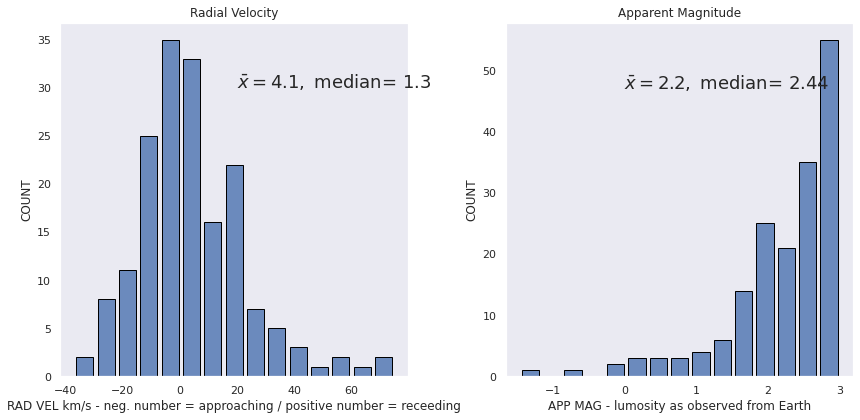

In [19]:
##remove grid
sns.set_style(style='dark')

##setup subplots
f, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw=dict(width_ratios=[6, 6]))

##declare color palette
c= ["#ffffff", "#ffffcc", "#ffff00", "#ff8000", "#99b3ff", "#ff1a1a", "#0040ff"]

##initialize 1st subplot
ax1 = sns.histplot(data=df, x=df['7'], shrink=.8, alpha=.8, legend=False, ax=axs[0], edgecolor="#000")
ax1.set(xlabel='RAD VEL km/s - neg. number = approaching / positive number = receeding', ylabel='COUNT', title='Radial Velocity')
ax1.text(20, 30, r'$\bar{x}=4.1,\ $median= 1.3', fontsize=18)
#ax1.set_yticklabels(ax1.get_yticks(), size = 15)

##initialize 2nd subplot
ax2 = sns.histplot(data=df, x=df['5'], shrink=.8, alpha=.8, legend=False, ax=axs[1], edgecolor="#000")
ax2.set(xlabel='APP MAG - lumosity as observed from Earth', ylabel='COUNT', title='Apparent Magnitude')
ax2.text(0, 47, r'$\bar{x}=2.2,\ $median= 2.44', fontsize=18)


f.tight_layout()

I started off with another scatter plot with RAD VEL on the x-axis and DISTANCE(LY) on the y-axis. I assumed there to be a strong correlation between the two, but the r value was < 0.4

For my first visualization, I used a histogram to group the 173 brightest star's by their respective radial velocities. I hypothesized that the majority of stars would have negative rad. vel. thus indicating approach. The visualization was backed up my assumption since I was presented with a slightly right skewed histogram (mean > median).

For my second visualization, I used a histogram to group the stars by their apparent magnitudes. I realized afterwards that my dataset only contains stars up to an APP MAG of 3.0 instead of the naked-eye limit of 7.0. This heavily effected my data but the ouput is still logical as the brightest star(Sirus) is -1.33. This was a left/negative-skewed histogram, indicating a higher collection of higher numbers. I expected a higher concentration of values around the 1-2.5 bins, but 3.0 seems to be the sweet spot. 

<center><h2>Network of Spectral Types</h2>

<p>
As a second example of our data analysis, we construct and visualize the network of contacts
between the 7 spectral classes according to their distance.
Below, there is a reference chart with information pertaining to the spectral classes that are incorporated in the data used. O(Blue) is the hottest, and M(Red) is the coolest. 
</p>


<table id="spectral-classes"><thead><tr><th>
						Spectral Class</th>
<th>
						Effective Temperature (K)</th>
<th>
						Color</th>
<th>
						H Balmer Features</th>
<th>
						Other Features</th>
<th>
						M/M<sub>Sun</sub></th>
<th>
						R/R<sub>Sun</sub></th>
<th>
						L/L<sub>Sun</sub></th>
<th>
						Main Sequence Lifespan</th>
</tr></thead><tbody><tr><td class="O-spectral-class">
						O</td>
<td>
						28,000 - 50,000</td>
<td>
						Blue</td>
<td>
						weak</td>
<td>
						ionised He<sup>+</sup> lines, strong UV continuum</td>
<td>
						20 - 60</td>
<td>
						9 - 15</td>
<td>
						90,000 - 800,000</td>
<td>
						1 - 10 Myr</td>
</tr><tr><td class="B-spectral-class">
						B</td>
<td>
						10,000 - 28,000</td>
<td>
						Blue-white</td>
<td>
						medium</td>
<td>
						neutral He lines</td>
<td>
						3 - 18</td>
<td>
						3.0 - 8.4</td>
<td>
						95 - 52,000</td>
<td>
						11 - 400 Myr</td>
</tr><tr><td class="A-spectral-class">
						A</td>
<td>
						7,500 - 10,000</td>
<td>
						White</td>
<td>
						strong</td>
<td>
						strong H lines, ionised metal lines</td>
<td>
						2.0 - 3.0</td>
<td>
						1.7 - 2.7</td>
<td>
						8 -55</td>
<td>
						400 Myr - 3 Gyr</td>
</tr><tr><td class="F-spectral-class">
						F</td>
<td>
						6,000 - 7,500</td>
<td>
						White-yellow</td>
<td>
						medium</td>
<td>
						weak ionised Ca<sup>+</sup></td>
<td>
						1.1 - 1.6</td>
<td>
						1.2 - 1.6</td>
<td>
						2.0 - 6.5</td>
<td>
						3 - 7 Gyr</td>
</tr><tr><td class="G-spectral-class">
						G</td>
<td>
						4,900 - 6,000</td>
<td>
						Yellow</td>
<td>
						weak</td>
<td>
						ionised Ca<sup>+</sup>, metal lines</td>
<td>
						0.85 - 1.1</td>
<td>
						0.85 - 1.1</td>
<td>
						0.66 - 1.5</td>
<td>
						7 - 15 Gyr</td>
</tr><tr><td class="K-spectral-class">
						K</td>
<td>
						3,500 - 4,900</td>
<td>
						Orange</td>
<td>
						very weak</td>
<td>
						Ca<sup>+</sup>, Fe, strong molecules, CH, CN</td>
<td>
						0.65 - 0.85</td>
<td>
						0.65 - 0.85</td>
<td>
						0.10 - 0.42</td>
<td>
						17 Gyr</td>
</tr><tr><td class="M-spectral-class">
						M</td>
<td>
						2,000 - 3,500</td>
<td>
						Red</td>
<td>
						very weak</td>
<td>
						molecular lines, eg TiO, neutral metals</td>
<td>
						0.08 - 0.05</td>
<td>
						0.17 - 0.63</td>
<td>
						0.001 - 0.08</td>
<td>
						56 Gyr</td>
</tr><tr><td class="L-spectral-class">
						L?</td>
<td>
						&lt;2,000</td>
<td colspan="3">
						Tentative new (2000) classification for very low mass stars.</td>
<td>
						&lt;0.08</td>
<td colspan="3">
						May or may not be fusing H in cores?</td>
</tr></tbody></table>

First, let's visualize the spectral types distribution with a histogram.

<AxesSubplot:xlabel='3', ylabel='Count'>

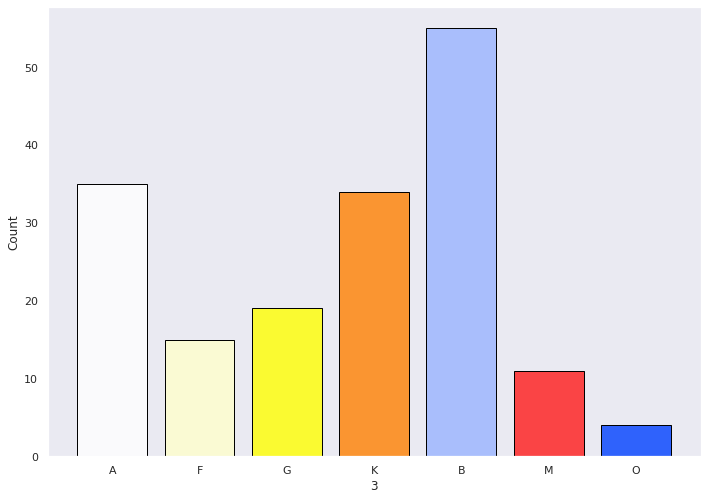

In [20]:

##declare color palette
c= ["#ffffff", "#ffffcc", "#ffff00", "#ff8000", "#99b3ff", "#ff1a1a", "#0040ff"]

##set figure size & remove grid
sns.set(rc={'figure.figsize':(11.7,8.27)}, style='dark')
#sns.set_xlabel('Class')

##plot histogram
sns.histplot(data=df, x=df['3'], hue=df['3'], shrink=.8, alpha=.8, legend=False, palette=c, edgecolor="#000")


Below, is a basic network with class and distances as the nodes. 

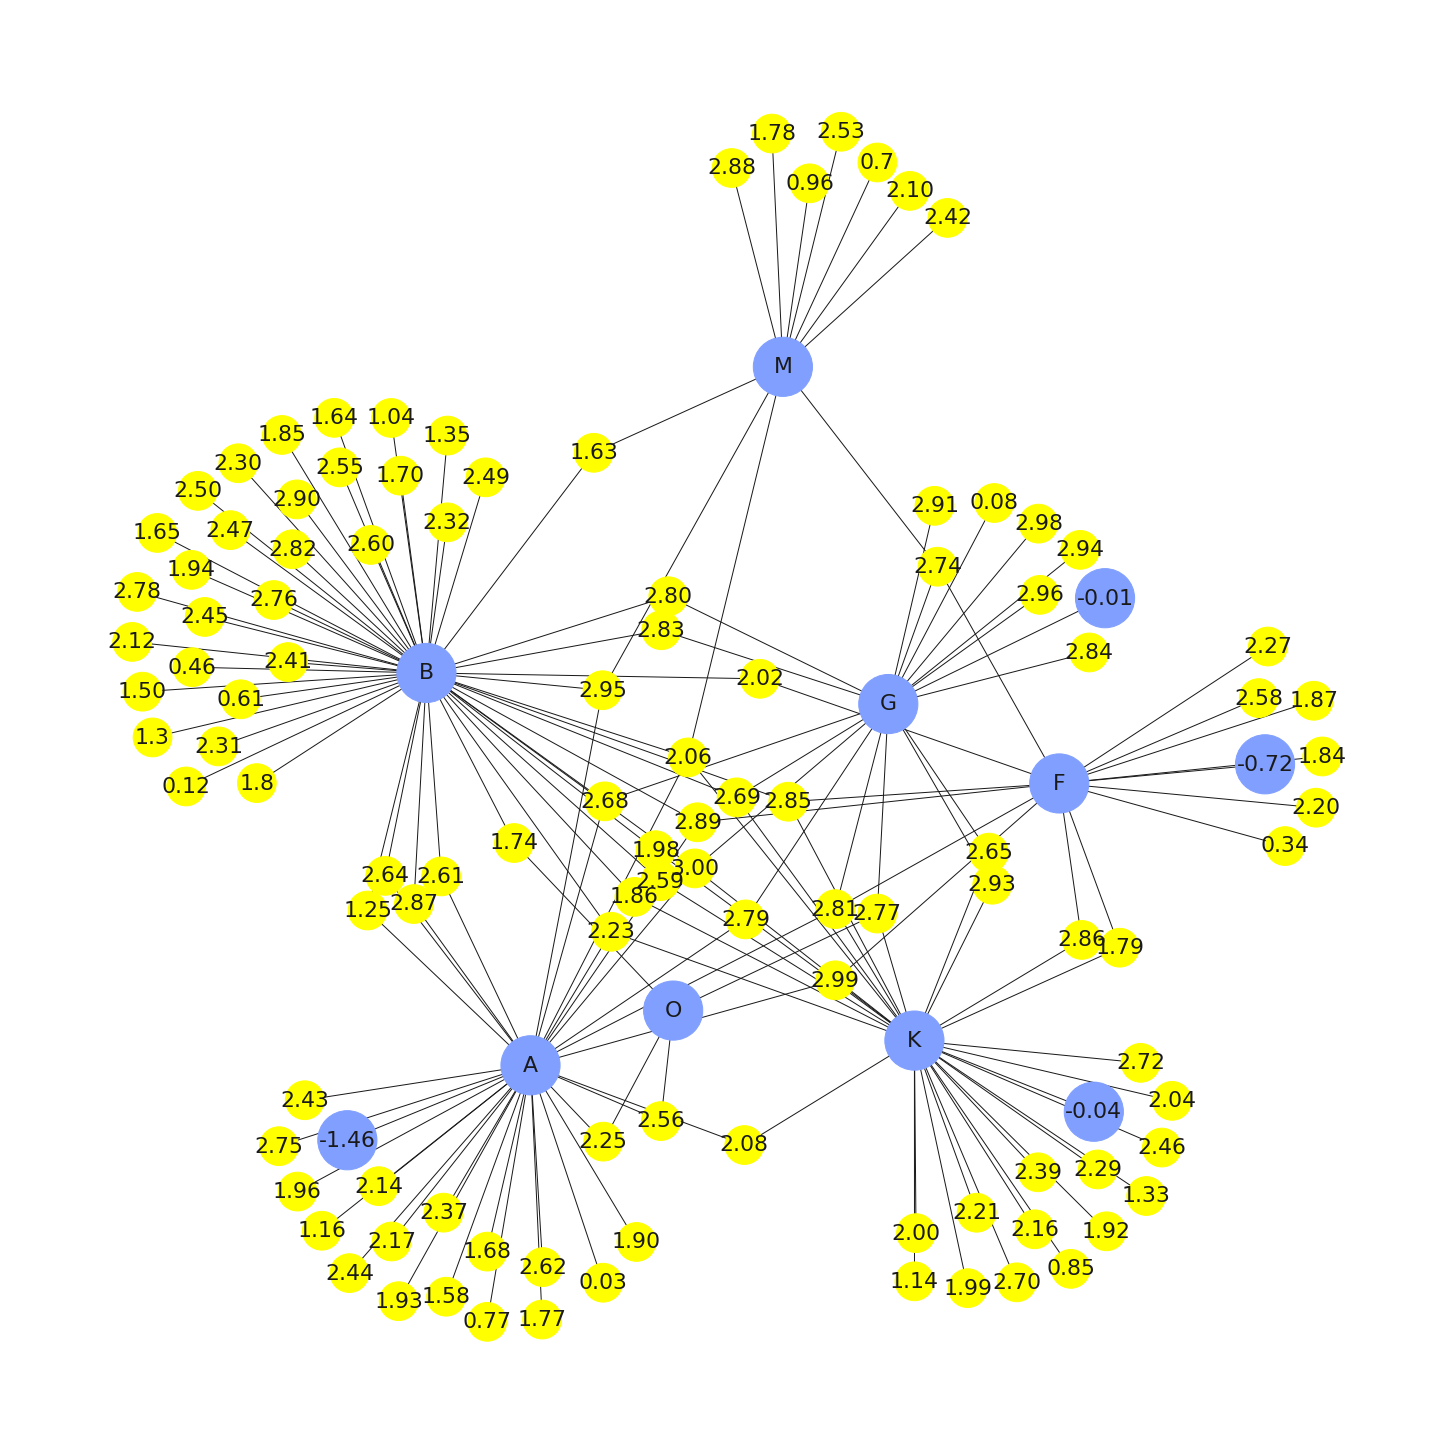

In [30]:
##Displaying csv data with pandas dataframe
df1 = pd.read_csv('1stars.csv')
df1 = df1.drop(labels=0, axis=0)

##Replacing class variations
del df1['0']
df1['3'] = df1['3'].str.replace(r'^A[\(\)\+\.\-+a-zA-Z0-9]+', 'A', regex = True)
df1['3'] = df1['3'].str.replace(r'^F[\(\)\+\.\-+a-zA-Z0-9]+', 'F', regex = True)
df1['3'] = df1['3'].str.replace(r'^G[\(\)\+\.\-+a-zA-Z0-9]+', 'G', regex = True)
df1['3'] = df1['3'].str.replace(r'^K[\(\)\+\.\-+a-zA-Z0-9]+', 'K', regex = True)
df1['3'] = df1['3'].str.replace(r'^B[\(\)\+\.\-+a-zA-Z0-9]+', 'B', regex = True)
df1['3'] = df1['3'].str.replace(r'^O[\(\)\+\.\-+a-zA-Z0-9]+', 'O', regex = True)
df1['3'] = df1['3'].str.replace(r'^M[\(\)\+\.\-+a-zA-Z0-9]+', 'M', regex = True)
df1['3'] = df1['3'].str.replace(r'^W[\(\)\+\.\-+a-zA-Z0-9]+', 'M', regex = True)

#d = {"O":0, "B":0, "A":0, "F":0, "G":0, "K":0, "M":0,}

df1 = df1[['3', '5']]
G = nx.DiGraph()
G = nx.from_pandas_edgelist(df1, '5','3', edge_attr='5')
durations = [i['5'] for i in dict(G.edges).values()]
#G.add_nodes_from(d.keys())
pos=nx.circular_layout(G)
fig = plt.figure()
fig.set_size_inches(20,20)

##draw graph
pos=nx.spring_layout(G)

##store nodes in var
node = G.nodes()
 

node_sizes = [4000 if entry == 'Letter' else 1000 for entry in df1['5']]
nx.draw(G,with_labels=True,node_size=[1500 if entry.replace(".", "", 1).isnumeric() else 3500 for entry in node],font_size=22,node_color=["yellow" if entry.replace(".", "", 1).isnumeric() else "#809fff" for entry in node], pos=pos)

plt.show()


Now, we generate a weighted network. The weight indicates the frequency of same distances between class types. A dictionary is utilized to count the number of class occurences and use that to adjust node size(attempted). A few other changes are shown below:  

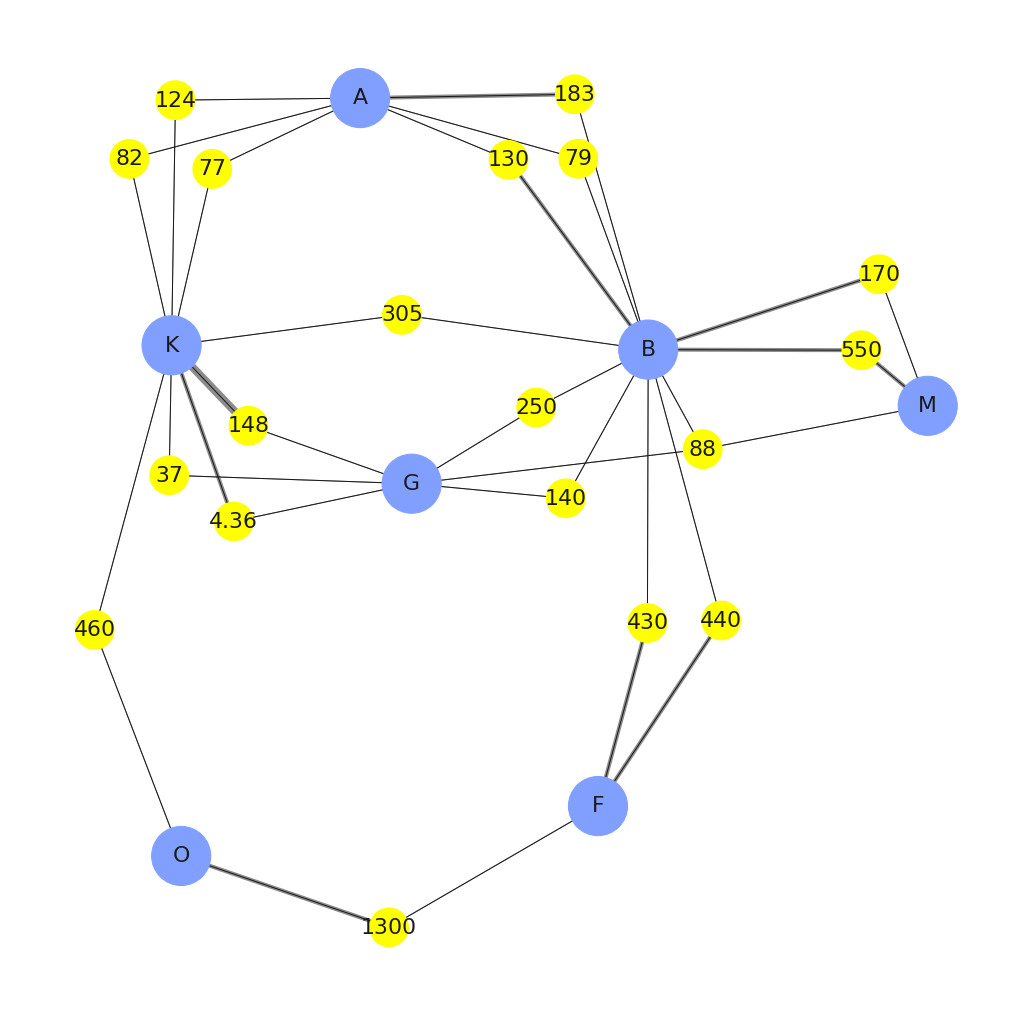

In [32]:

##Displaying csv data with pandas dataframe
df1 = pd.read_csv('1stars.csv',index_col=False)
df1 = df1.drop(labels=0, axis=0)

##Replacing class variations
del df1['0']
df1['3'] = df1['3'].str.replace(r'^A[\(\)\+\.\-+a-zA-Z0-9]+', 'A', regex = True)
df1['3'] = df1['3'].str.replace(r'^F[\(\)\+\.\-+a-zA-Z0-9]+', 'F', regex = True)
df1['3'] = df1['3'].str.replace(r'^G[\(\)\+\.\-+a-zA-Z0-9]+', 'G', regex = True)
df1['3'] = df1['3'].str.replace(r'^K[\(\)\+\.\-+a-zA-Z0-9]+', 'K', regex = True)
df1['3'] = df1['3'].str.replace(r'^B[\(\)\+\.\-+a-zA-Z0-9]+', 'B', regex = True)
df1['3'] = df1['3'].str.replace(r'^O[\(\)\+\.\-+a-zA-Z0-9]+', 'O', regex = True)
df1['3'] = df1['3'].str.replace(r'^M[\(\)\+\.\-+a-zA-Z0-9]+', 'M', regex = True)
df1['3'] = df1['3'].str.replace(r'^W[\(\)\+\.\-+a-zA-Z0-9]+', 'M', regex = True)

wins = df['3'].to_string(index=False, header=False)

##setup dic
d = {"O":0, "B":0, "A":0, "F":0, "G":0, "K":0, "M":0,}

##count occurences and update values
oc = 0
for win in wins:
    if win == 'O':
        oc += 1
        d.update({"O": oc})

bc = 0
for win in wins:
    if win == 'B':
        bc += 1
        d.update({"B": bc})
        
ac = 0
for win in wins:
    if win == 'A':
        ac += 1
        d.update({"A": ac})

fc = 0
for win in wins:
    if win == 'F':
        fc += 1
        d.update({"F": fc})

gc = 0
for win in wins:
    if win == 'G':
        gc += 1
        d.update({"G": gc})

kc = 0
for win in wins:
    if win == 'K':
        kc += 1
        d.update({"K": kc})

mc = 0
for win in wins:
    if win == 'M':
        mc += 1
        d.update({"M": mc})


##initialize pandas graph
G = nx.from_pandas_edgelist(df1, '4','3')

##group dup. values and input to new column 
df1['weight'] = df1.groupby('4')['3'].transform(len)

##create figure object
fig = plt.figure()
fig.set_size_inches(14,14)

##store nodes in var
node = G.nodes()

##remove unique values
outdeg = G.degree()
to_remove = [n for (n, deg) in outdeg if deg == 1]
G.remove_nodes_from(to_remove)

##draw graph
pos=nx.spring_layout(G)
x = df1['weight'].to_string(index=False)

##add edge weight based on freq. 
edgewidth = [4 if y == '2' else 8 if y == '3' else 1 for y in x]

##show the figure
nx.draw(G,with_labels=True,node_size=[1500 if entry.replace(".", "", 1).isnumeric() else 3500 for entry in node],font_size=22,node_color=["yellow" if entry.replace(".", "", 1).isnumeric() else "#809fff" for entry in node], pos=pos)
nx.draw_networkx_edges(G, pos, width=edgewidth, alpha=0.5)
plt.draw()
plt.show()

In this visualization, I attempted to make the size of the nodes proportional to the total number of class instances, but was unsuccesful, so I instead amplified the size of class nodes to be larger than distance nodes to make the distinction apparent. The width of the edges is proportional to the their commonly shared distances. Only showing duplicate values helped make the visualization more useful. 
This visualization tells us that some star class types are found at similar distances as oneanother. This result is not groundbreaking since their are numerous stars out there. Nonetheless it was still interesting to see the similarities between the class types and distances.

<center><h2>Conclusions</h2>

<p>
Throughout the project I heavily analyzed a smallscale data set pertaining to the name, spectral class, distance(LY), apparent magnitude, absolute magnitude, radial velocity(km/s), velocity(km/s), and temperature(K) of the 173 brightest stars. My hypothesese were not always correct, but I learned useful analysis skills along the way that I will be able to easily duplicate with future work.  
</p>

<p>
I believe that some of my hypothesese, reguarding my scatter plots 1-2 could be proven with larger data sets. I can utilize observatory data and run my simulation on these large datasets to see if there are noticable trends. 
</p>



